In [11]:
import os
from datetime import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from analsis.analsis_utils.plot_utils import _get_binned_results_table, \
    plot_two_binned_metrices_vs_third_means_metrics_colors, plot_bar_plot_of_used_features
import joblib

In [13]:
task = "retina"
results_path = f"/Volumes/noamaz/modularity/teach_archs/{task}"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
results_csv_name = "2023-07-15-14-01-13_all_results_from_retina_teach_archs_results_with_motifs_no_duplicates.csv"
results = pd.read_csv(f"{results_path}/{results_csv_name}")
mean_metric_name = "mean_performance"
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

In [6]:
results

,Unnamed: 0,exp_name,modularity,entropy,normed_entropy,num_connections,median_performance,mean_performance,max_performance,performance_std,connectivity_ratio,num_successes_1.0,success_percent_1.0,motifs_count_0,motifs_count_1,motifs_count_2
0,0,best_2023-02-11-15-47_273_tr_0.9_200,0.343750,2.260234,0.767628,19,0.812500,0.725446,1.0000,0.162632,0.26,24,0.118227,1,19,10
1,1,best_2023-02-02-10-41_101_connectivity_ratio_0...,0.353741,2.557508,0.853717,21,0.812500,0.761853,1.0000,0.144835,0.29,20,0.076628,3,19,8
2,2,best_2023-02-02-10-41_944_connectivity_ratio_0...,0.304498,2.491494,0.831681,21,0.687500,0.731831,1.0000,0.150422,0.29,28,0.130233,6,18,9
3,3,best_2023-02-11-18-22_7083_tr_0.6_50,0.332410,2.466577,0.823364,21,0.828125,0.797085,1.0000,0.156440,0.29,1,0.003367,4,20,10
4,4,best_2023-02-02-10-41_4840_connectivity_ratio_...,0.243827,2.572115,0.858593,36,0.937500,0.918036,1.0000,0.088914,0.50,10,0.057143,30,57,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,41038,best_2023-02-11-17-45_5402_tr_0.7_100,0.315000,2.326543,0.804929,22,0.937500,0.841657,1.0000,0.159948,0.31,16,0.076555,5,27,14
27865,41041,best_2023-02-11-17-50_5633_tr_0.7_200,0.224766,2.506926,0.836832,32,0.937500,0.911914,1.0000,0.092750,0.44,4,0.016667,20,48,30
27866,41044,best_2023-02-02-10-41_1518_connectivity_ratio_...,0.347107,2.524700,0.857447,26,0.937500,0.860497,1.0000,0.155083,0.36,22,0.121547,12,34,17
27867,41047,best_2023-02-02-10-43_4663_connectivity_ratio_...,0.197232,2.552085,0.851907,38,0.937500,0.935244,1.0000,0.034815,0.53,6,0.021661,36,60,41


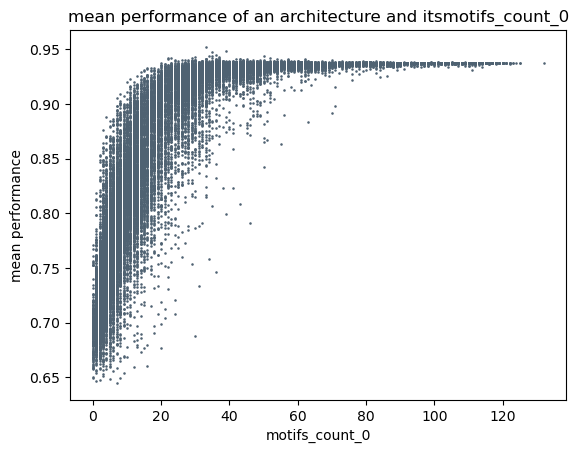

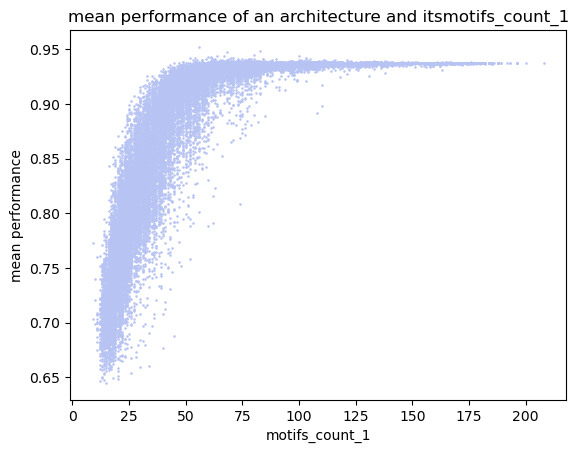

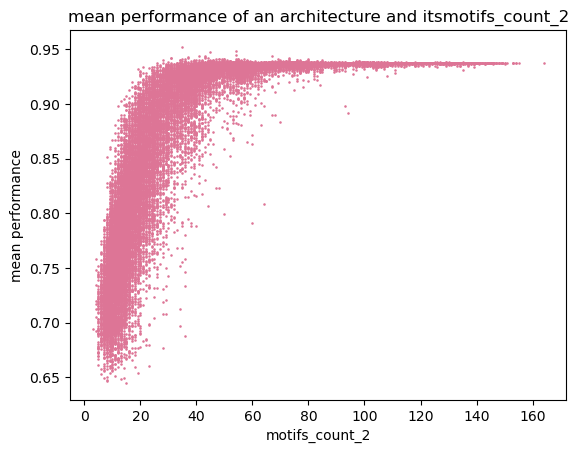

In [8]:
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']
motifs_column_names = [
    'motifs_count_0',
    'motifs_count_1',
    'motifs_count_2',
]
for i, metric_name in enumerate(motifs_column_names):
    plt.scatter(results[metric_name], results[f'{mean_metric_name}'], c=COLORS[i], s=0.7)
    plt.ylabel(f"{mean_metric_name.replace('_', ' ')}")
    plt.xlabel(metric_name)
    plt.title(f"{mean_metric_name.replace('_', ' ')} of an architecture and its"
              f"{metric_name}", loc='center', wrap=True)
    plt.savefig(
        f"{local_base_path}/plots/{task}_teachbility_plots/{time_str}_{task}_{metric_name}_vs_{mean_metric_name}.png")
    plt.show()


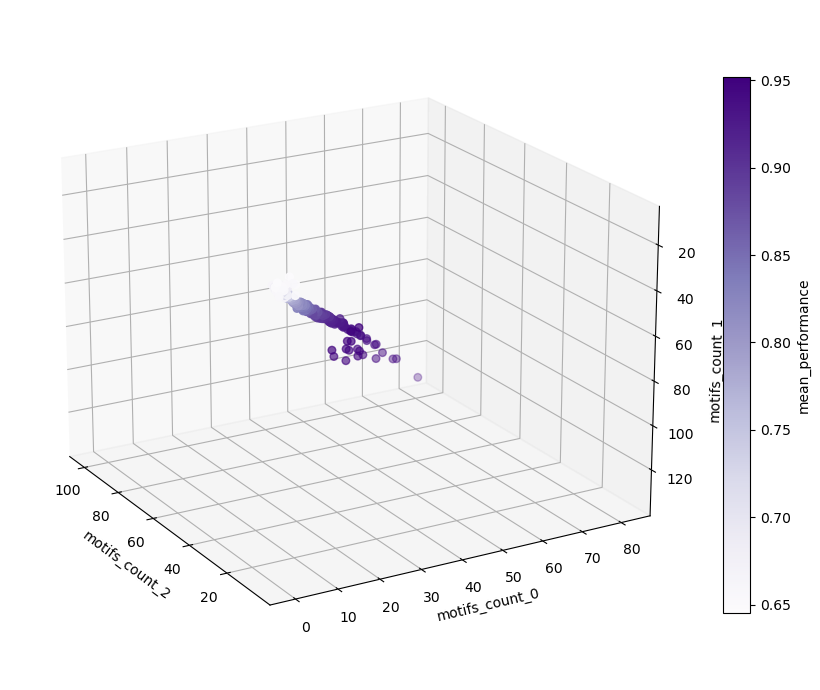

In [22]:
name_addition = 'motifs'
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
r2 = _get_binned_results_table(
    metric_names=motifs_column_names,
    mean_metric_name=mean_metric_name,
    result_df=results,
    bins_size=500,
    plot_error_bars=False,
)
y, z, x = motifs_column_names
p3d = ax.scatter(r2[x], r2[y], r2[z], s=30,
                 c=np.linspace(r2[f'{mean_metric_name}_2'].min(), r2[f'{mean_metric_name}_2'].max(),
                               num=r2[f'{mean_metric_name}_2'].shape[0]),
                 cmap='Purples')
fig.colorbar(p3d, pad=0.05, shrink=0.8, location='right', label=mean_metric_name)

ax.view_init(-160, 30)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.tight_layout()
plt.savefig(
    f"{local_base_path}/plots/{task}_teachbility_plots/{time_str}_{task}{name_addition}_three_metrices_vs_{mean_metric_name}.png")
plt.show()

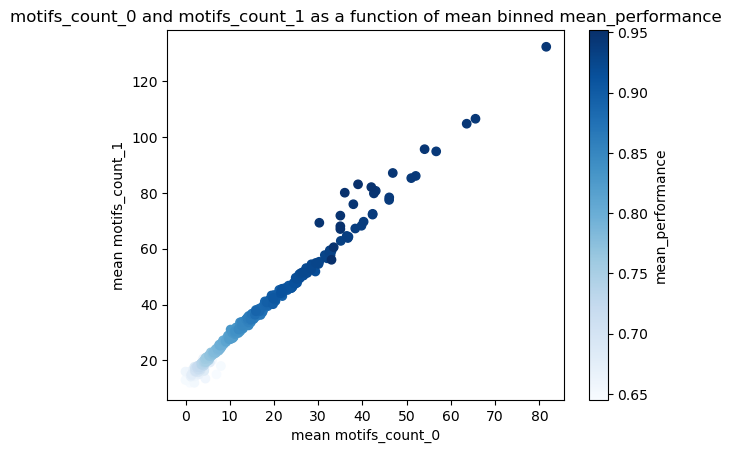

In [26]:
plot_two_binned_metrices_vs_third_means_metrics_colors(
    metric_names=['motifs_count_0',
                  'motifs_count_1',
                  ],
    mean_metric_name=mean_metric_name,
    result_df=results,
    time_str=time_str,
    task=task,
    color_scheme="Blues",
    local_base_path=local_base_path,
    plot_error_bars=False
)

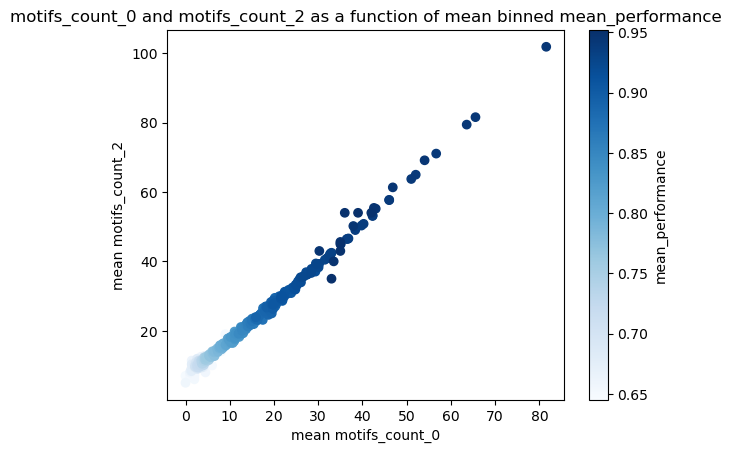

In [27]:
plt.show()
plot_two_binned_metrices_vs_third_means_metrics_colors(
    metric_names=['motifs_count_0',
                  'motifs_count_2',
                  ],
    mean_metric_name=mean_metric_name,
    result_df=results,
    time_str=time_str,
    task=task,
    color_scheme="Blues",
    local_base_path=local_base_path,
    plot_error_bars=False
)

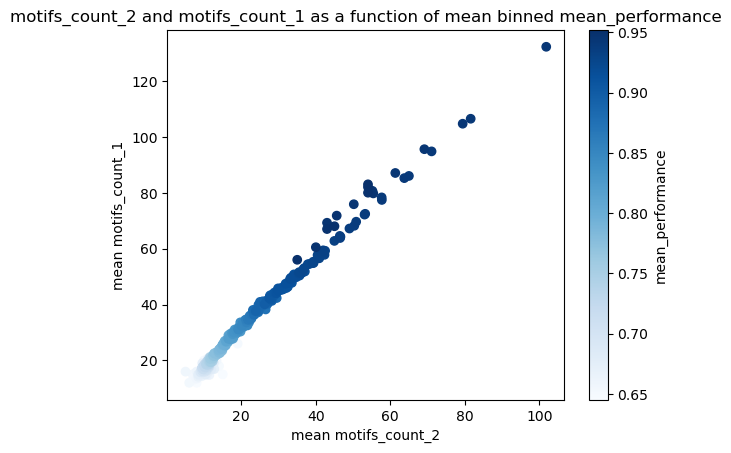

In [28]:
plt.show()
plot_two_binned_metrices_vs_third_means_metrics_colors(
    metric_names=['motifs_count_2',
                  'motifs_count_1',
                  ],
    mean_metric_name=mean_metric_name,
    result_df=results,
    time_str=time_str,
    task=task,
    color_scheme="Blues",
    local_base_path=local_base_path,
    plot_error_bars=False
)

In [39]:
metric_name = 'mean_motif_count'
results[metric_name] =results[motifs_column_names].mean(axis=1)

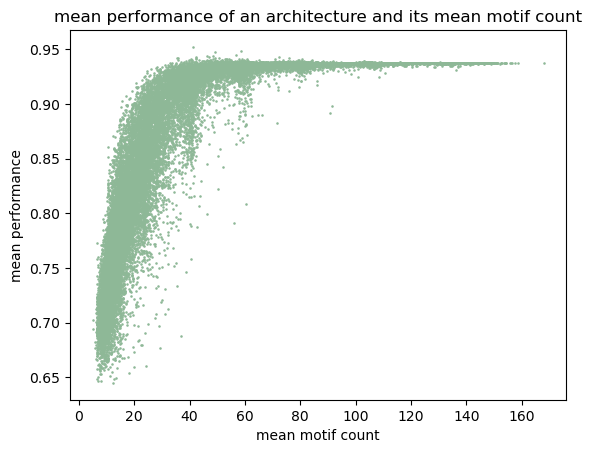

In [41]:
plt.scatter(results[metric_name], results[f'{mean_metric_name}'], c=COLORS[i+1], s=0.7)
plt.ylabel(f"{mean_metric_name.replace('_', ' ')}")
plt.xlabel(f"{metric_name.replace('_', ' ')}")
plt.title(f"{mean_metric_name.replace('_', ' ')} of an architecture and its "
          f"{metric_name.replace('_', ' ')}", loc='center', wrap=True)
plt.savefig(
    f"{local_base_path}/plots/{task}_teachbility_plots/{time_str}_{task}_mean_motif_vs_{mean_metric_name}.png")
plt.show()

In [47]:
models_folder = f'{results_path}/retina_lightgbm_feature_selection/with_motifs/exp_2023-07-15-14-42-49/masked_data_models'
used_features ={}
for model_name in os.listdir(models_folder):
    with open(f'{models_folder}/{model_name}', 'rb') as fp:
        model = joblib.load(fp)
    used_features[model['num_features']] = model['selected_feature_names']

In [48]:
used_features

{5: ['modularity',
  'normed_entropy',
  'distances_between_input_neuron_2',
  'num_paths_to_output_per_input_neuron_(0_5)',
  'motifs_1'],
 20: ['modularity',
  'entropy',
  'normed_entropy',
  'connectivity_ratio',
  'total_connectivity_ratio_between_layers_3',
  'distances_between_input_neuron_1',
  'distances_between_input_neuron_2',
  'distances_between_input_neuron_4',
  'distances_between_input_neuron_9',
  'distances_between_input_neuron_11',
  'distances_between_input_neuron_13',
  'num_paths_to_output_per_input_neuron_(0_0)',
  'num_paths_to_output_per_input_neuron_(0_1)',
  'num_paths_to_output_per_input_neuron_(0_2)',
  'num_paths_to_output_per_input_neuron_(0_3)',
  'num_paths_to_output_per_input_neuron_(0_4)',
  'num_paths_to_output_per_input_neuron_(0_5)',
  'num_involved_neurons_in_paths_per_input_neuron_(0_2)',
  'num_involved_neurons_in_paths_per_input_neuron_(0_3)',
  'motifs_1'],
 1: ['normed_entropy'],
 15: ['modularity',
  'entropy',
  'normed_entropy',
  'connect

In [14]:
base_path = '/Volumes/noamaz/modularity'
used_features = f'{base_path}/teach_archs/retina/retina_lightgbm_feature_selection/with_motifs/exp_2023-07-15-14-42-49/2023-07-15-14-42-49_1_20_used_features.csv'
used_features_df = pd.read_csv(used_features).drop("Unnamed: 0", axis=1).rename(columns={'connectivity_ratio': 'density'})
sum_uses = used_features_df.sum().sort_index().sort_values(ascending=False)

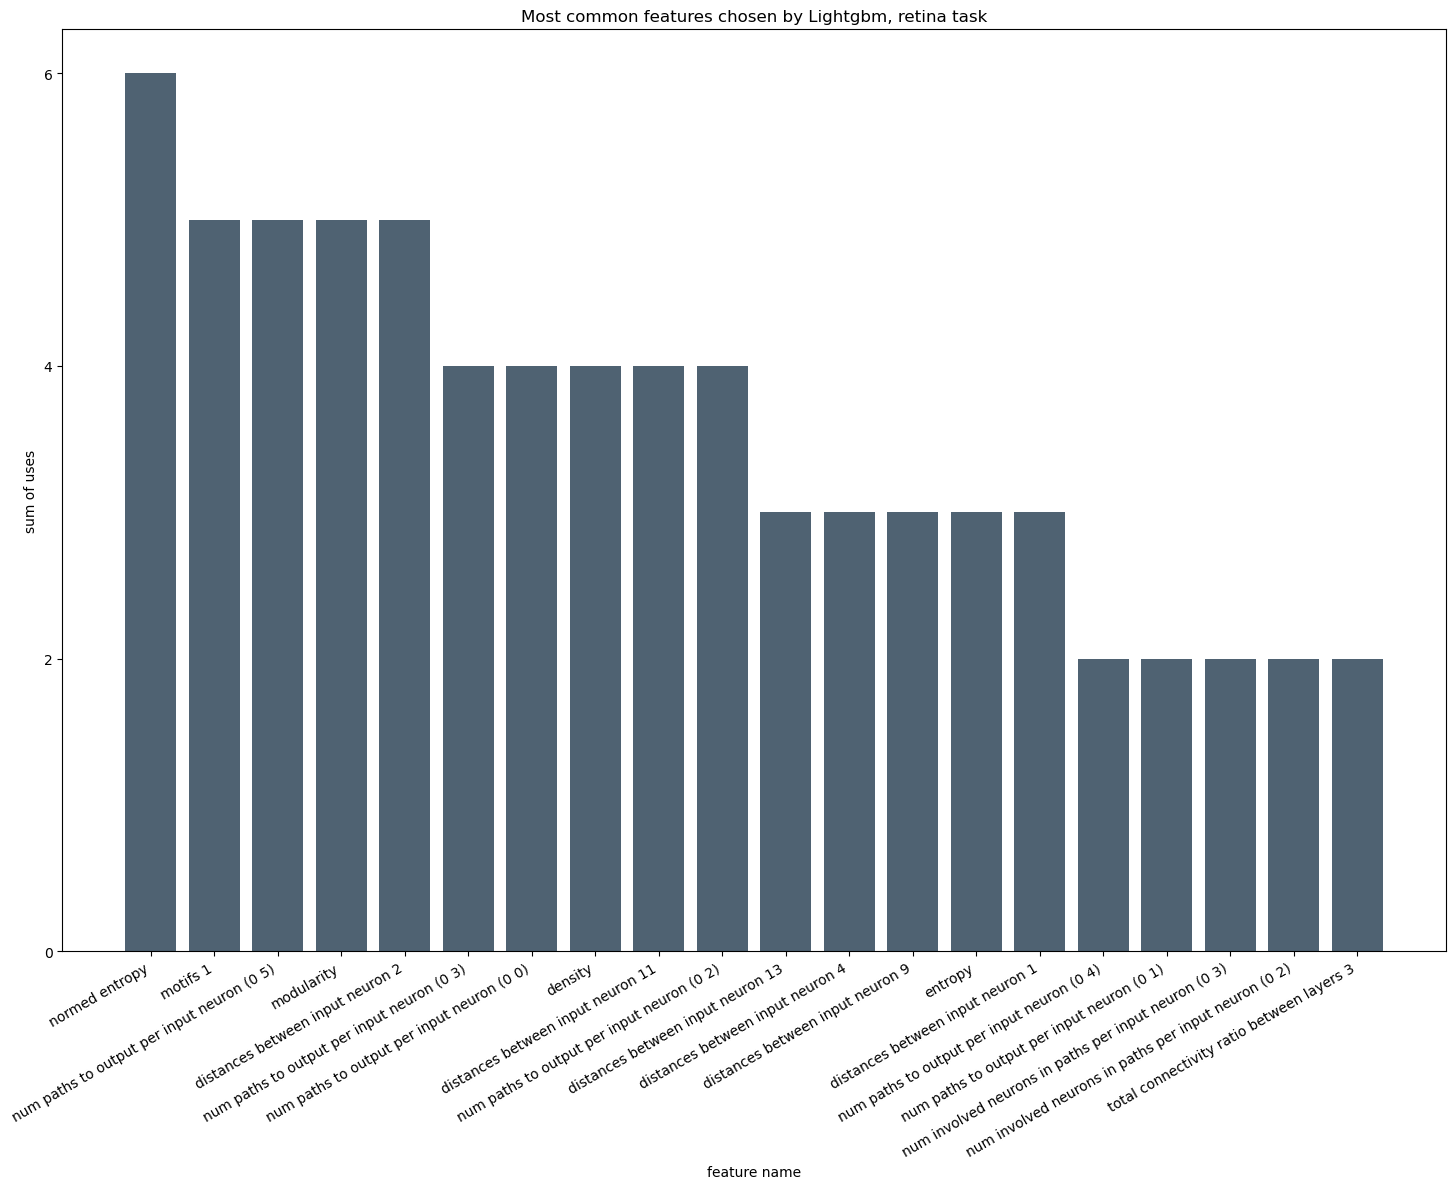

In [17]:

cut = 20
is_top = True
plot_bar_plot_of_used_features(
    sum_uses=sum_uses,
    cut=cut,
    fig_out_folder=f"{task}_teachbility_plots/",
    local_base_path=local_base_path,
    time_str=time_str,
    task=task,
    is_top=is_top,
    regressor='Lightgbm',
)